восхитительный индийский диван - товар проданный максимальное количество раз (184)

блистательный русский пылесос - товар с максимальной выручкой (6139668)


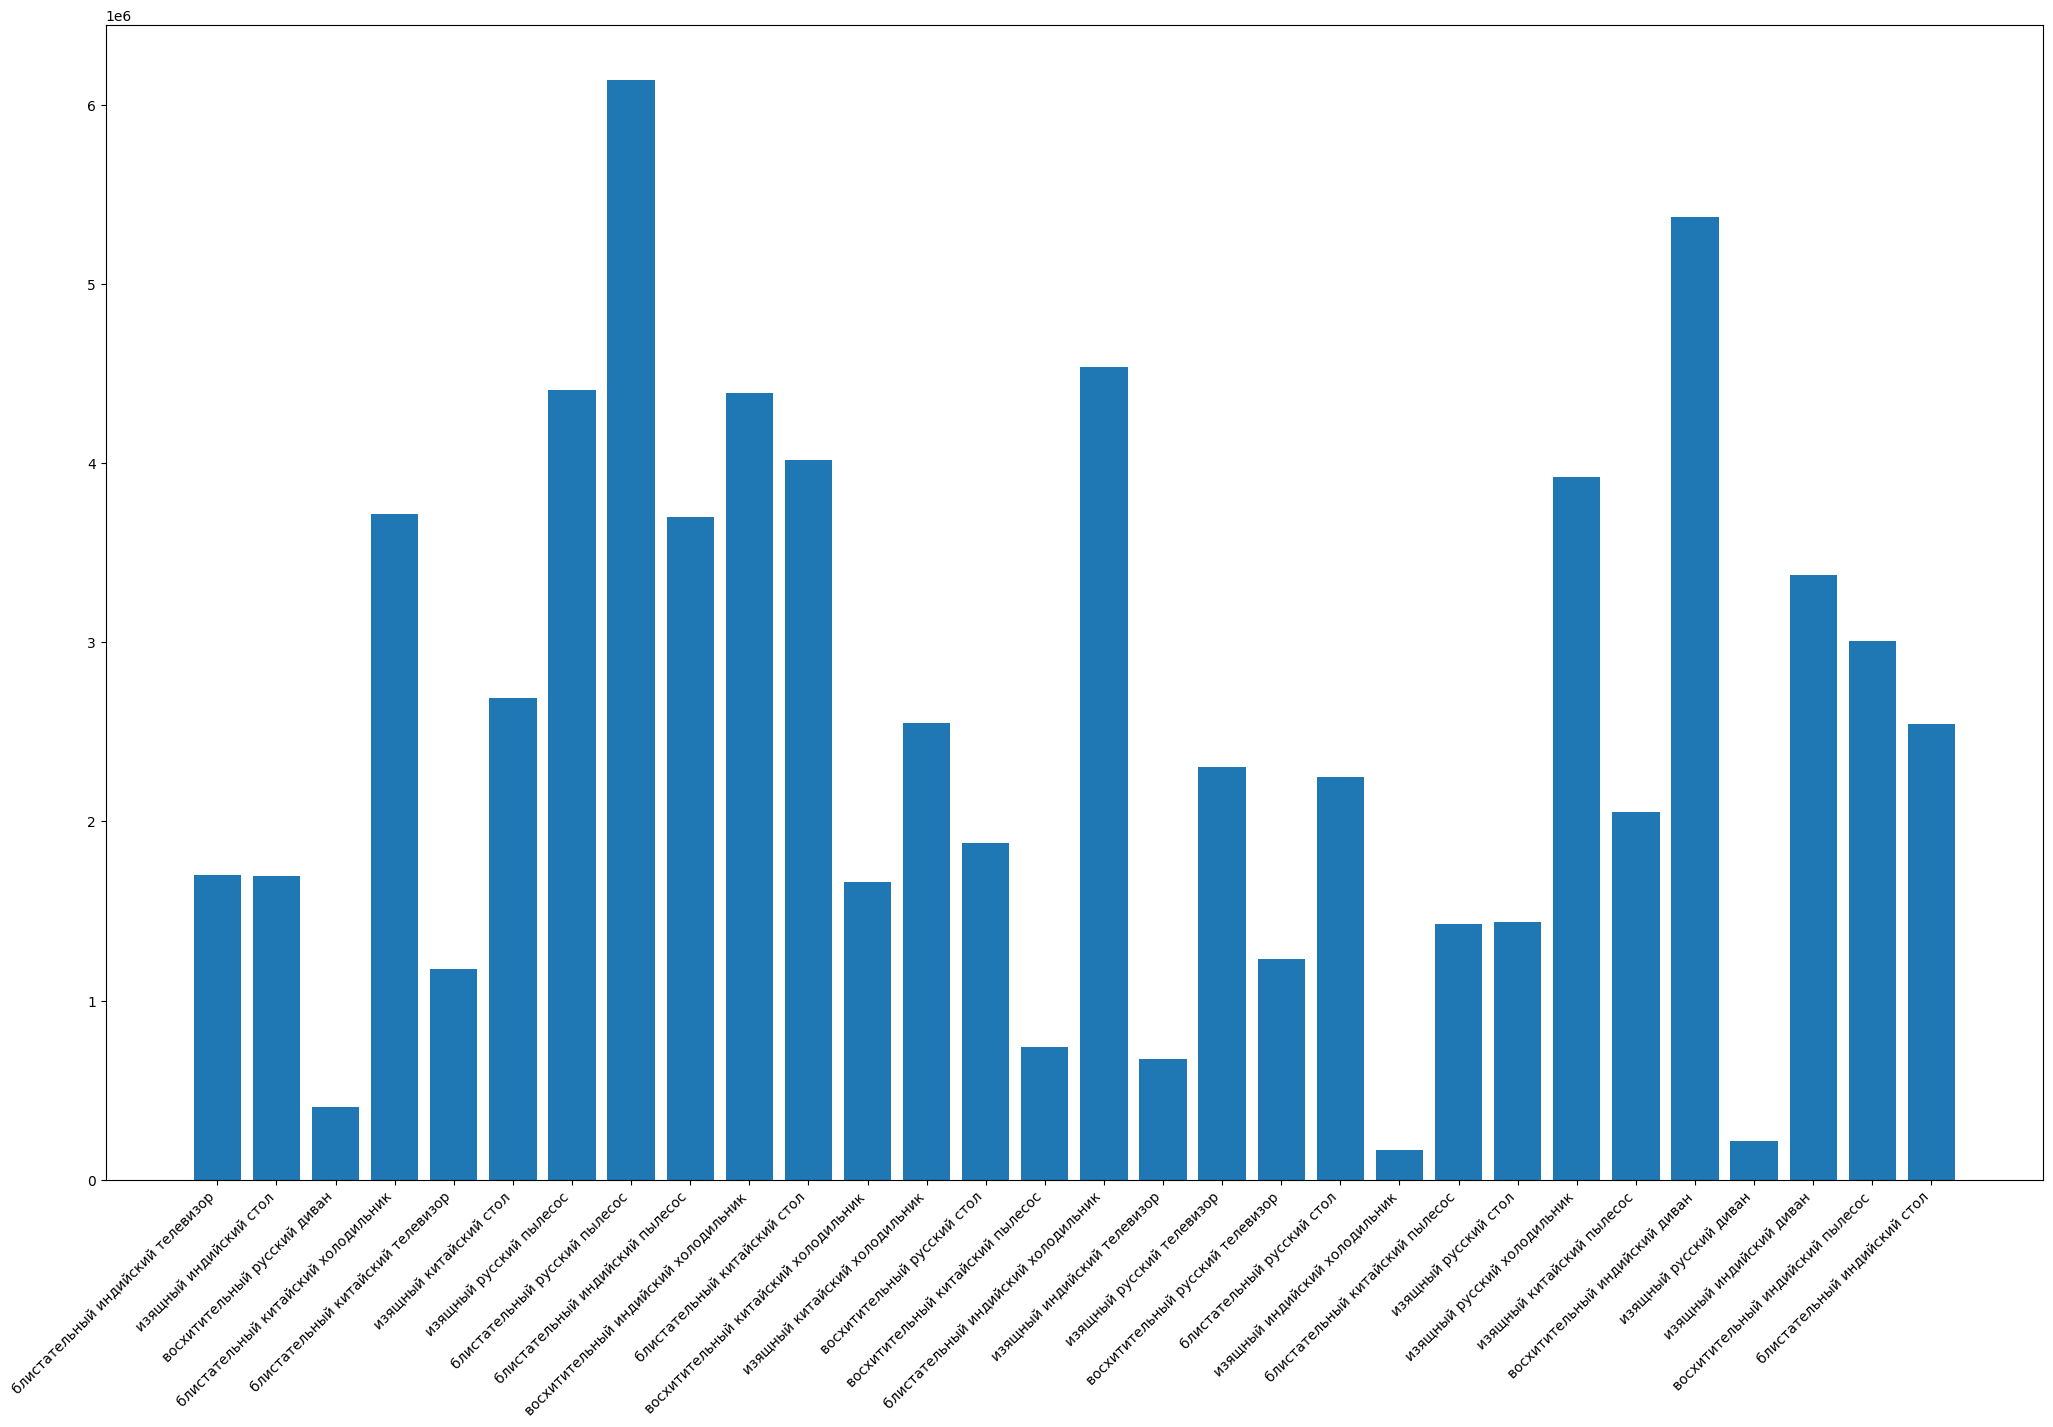

In [40]:
from random import randrange, choice, randint
from itertools import product
from datetime import datetime

import re
import matplotlib.pyplot as plt

class Stack:
    def __init__(self):
        self.stack = []
    
    def put(self, element):
        self.stack.append(element)
    
    def pop(self):
        return self.stack.pop()
    
    def peek(self):
        return self.stack[-1]
    
    def is_empty(self):
        return not bool(self.stack)

class HashTable:
    def __init__(self):
        self.hash_table = [[] for _ in range(1000)]

    def put(self, key, value):
        string_hash = self._get_string_hash(key)
        self.remove(key)
        self.hash_table[string_hash % 1000].append([string_hash, key, value])

    def get(self, string):
        string_hash = self._get_string_hash(string)
        for hash_table_item in self.hash_table[string_hash % 1000]:
            if hash_table_item[0] == string_hash:
                return hash_table_item[2]
        
        return None
    
    def remove(self, key):
        key_hash = self._get_string_hash(key)
        for index, hash_table_item in enumerate(self.hash_table[key_hash % 1000]):
            if hash_table_item[0] == key_hash:
                self.hash_table[key_hash % 1000][index], self.hash_table[key_hash % 1000][-1] = self.hash_table[key_hash % 1000][-1], self.hash_table[key_hash % 1000][index]
                self.hash_table[key_hash % 1000].pop()
                return
    
    def _get_string_hash(self, key):
        hash = 0
        for number, symbol in enumerate(key):
            hash += ord(symbol) * 31 ** number
        
        return hash

def validate(item):
    item = item.rstrip('\n').split(', ')
    if len(item) != 7:
        return False

    if not(item[0].isdigit()) and not(item[4].isdigit() and item[5].isdigit() and item[6].isdigit()):
        return False
    
    if int(item[0]) <= 0 and int(item[4]) <= 0 and int(item[5]) <= 0 and int(item[6]) <= 0:
        return False
    
    if not re.match('\d{2}.\d{2}.\d{4}', item[1]):
        return False

    return True

def get_random_date():
    start_date = "01.01.2010"
    start_date_timestamp = datetime.strptime(start_date, "%d.%m.%Y").timestamp()
    time_range = int(datetime.now().timestamp() - start_date_timestamp)
    return datetime.fromtimestamp(start_date_timestamp + randrange(time_range)).strftime('%d.%m.%Y')

def generate_data():
    item_property = ('восхитительный', 'блистательный', 'изящный')
    
    item_origin = ('китайский', 'русский', 'индийский')
    
    item_name = ('телевизор', 'пылесос', 'стол', 'холодильник', 'диван')
    
    items = [item for item in product(item_property, item_origin, item_name)]

    with open('product_data.csv', 'w') as f:
        for i in range(1, 51):
            price = randint(10000, 50000)
            amount = randint(1, 100)
            f.write(f"{i}, {get_random_date()}, {' '.join(choice(items))}, {'мебель' if 'стол' in item_name or 'диван' in item_name else 'техника'}, {price}, {amount}, {price * amount}\n")

def parse_items_from_csv():
    items_list = []
    with open('product_data.csv', 'r') as f:
        data = f.readline()
        count = 1
        while data:
            if not validate(data):
                print(f'Предупреждение: строка {count} невалидна. Она будет проигнорирована.')
                data = f.readline()
                continue
            validate(data)
            items_list.append(data.rstrip('\n').split(', '))
            data = f.readline()
            count += 1
    return items_list

def get_total_revenue(items_list):
    total_revenue = 0
    for item in items_list:
        total_revenue += int(item[-1])
    return total_revenue


def merge_sort(items_list, *, sort_field_index=0):
    if len(items_list) == 0 or len(items_list) == 1:
        return items_list
    
    if len(items_list) == 2:
        if items_list[0][sort_field_index] < items_list[1][sort_field_index]:
            return [items_list[0], items_list[1]]
        else:
            return [items_list[1], items_list[0]]
    
    mid = len(items_list) // 2
    left = merge_sort(items_list[:mid], sort_field_index=sort_field_index)
    right = merge_sort(items_list[mid:], sort_field_index=sort_field_index)

    i = 0
    j = 0
    sorted_part = []
    while i < len(left) and j < len(right):
        if left[i][sort_field_index] <= right[j][sort_field_index]:
            sorted_part.append(left[i])
            i += 1

        else:
            sorted_part.append(right[j])
            j += 1

    sorted_part.extend(left[i:])
    sorted_part.extend(right[j:])

    return sorted_part

def reverse(items):
    stack = Stack()
    for item in items:
        stack.put(item)

    reversed_list = []
    while not stack.is_empty():
        item = stack.pop()
        reversed_list.append(item)
    
    return reversed_list

def max_linear_search(items_list, *, search_field_index):
    maximum = float('-inf')
    maximum_item = None
    for item in items_list:
        if item[search_field_index] > maximum:
            maximum_item = item
            maximum = item[search_field_index]
    
    return maximum_item

def get_max_sold_item(items):
    hash_table = HashTable()
    for item in items:
        if not hash_table.get(item[2]):
            hash_table.put(item[2], int(item[5]))
        else:
            value = hash_table.get(item[2])
            hash_table.remove(item[2])
            hash_table.put(item[2], value + int(item[5]))

    sold_amount_data = []
    for item in items:
        sold_amount_data.append([item[2], hash_table.get(item[2])])
        
    max_sold_amount_item_data = max_linear_search(sold_amount_data, search_field_index=1)
    output = f'{max_sold_amount_item_data[0]} - товар проданный максимальное количество раз ({max_sold_amount_item_data[1]})\n'
    print(output)
    f.write(output)

def get_max_revenue_item(items):
    hash_table = HashTable()
    for item in items:
        if not hash_table.get(item[2]):
            hash_table.put(item[2], int(item[6]))
        else:
            value = hash_table.get(item[2])
            hash_table.remove(item[2])
            hash_table.put(item[2], value + int(item[6]))
    
    revenue_amount_data = []
    for item in items:
        revenue_amount_data.append([item[2], hash_table.get(item[2])])
    
    sorted_items = merge_sort(revenue_amount_data, sort_field_index=1)
    reversed_sorted_items = reverse(sorted_items)
    output = f'{reversed_sorted_items[0][0]} - товар с максимальной выручкой ({reversed_sorted_items[0][1]})\n'
    print(output)
    f.write(output)

def prepare_report(items):
    hash_table = HashTable()
    for item in items:
        if not hash_table.get(item[2]):
            hash_table.put(item[2], [int(item[5]), int(item[6])])
        else:
            sold_value, revenue_value = hash_table.get(item[2])[0], hash_table.get(item[2])[1]
            hash_table.remove(item[2])
            hash_table.put(item[2], [sold_value + int(item[5]), revenue_value + int(item[6])])
    
    total_revenue = get_total_revenue(items)
    f.write('\n')
    f.write(f'Общая выручка: {total_revenue}\n')
    f.write('\n')
    f.write('Название товара'.ljust(40) + '|' + 'Продано штук'.ljust(12) + '|' + 'Доля от выручки'.ljust(15) + '\n')
    plot_data = []
    for item in items:
        if hash_table.get(item[2]):
            data = hash_table.get(item[2])
            revenue_percent = round(data[1] / total_revenue *  100, 2)
            f.write(f'{item[2]}'.ljust(40) + '|' + f'{data[0]}'.rjust(12) + '|' + f'{revenue_percent}%'.rjust(15) + '\n')
            hash_table.remove(item[2])
            plot_data.append([item[2], data[1]])
    plt.figure(figsize=(25, 15))
    plt.bar([item[0] for item in plot_data], height=[item[1] for item in plot_data])
    plt.xticks(rotation=45, ha='right')
    plt.show()
            


if __name__ == '__main__':
    # generate_data()
    with open('report.txt', 'w+') as f:
        items = parse_items_from_csv()
        get_max_sold_item(items)
        get_max_revenue_item(items)
        prepare_report(items)
